In [1]:
#ignore annoying deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Numeric Variable Transformation and Feature Engineering in Python!


## Introduction

Before building statistical or machine learning models, data scientists must examine the various numeric variables in the data set, and apply transformations to those variables as necessary in order to improve the variables' distributional properties and/or make them more covariate with other variables. This task is known as **variable transformation**, or sometimes as **data munging**.

In addition to transforming numeric variables for distributional purposes, data scientists must also commonly use the existing data in a data set as the basis for computing new variables that will ultimately become a part of the analysis. This process is known as **feature engineering**, and data scientists engage in this process in order to create variables that are more predictive or useful in subsequent analyses or models. There are many situations in which feature engineering can be used, including:
* combining two or more category labels into a single category (e.g., *girl* and *woman* to *female*)
* splitting continuous data into categories (e.g., *income* to *low income*, *middle income*, and *high income*)
* assigning numeric values to category labels (e.g., *education level* to *years of education*)
* computing interaction terms to capitalize on combinations of factors (e.g., the combination of *gender* and *wealth* may be a much more powerful predictor of whether a person will buy a luxury handbag than either of those factors individually).
* ...and many more!

In this lesson, we'll gain some experience in both variable transformation and feature engineering.

## Load Libraries and Data

For this lesson, we'll be using the *Affairs* data set that was originally described in the following paper:

Fair, Ray C. (1978). A Theory of Extramarital Affairs. Journal of Political Economy, 86(1), 45-61.

The data set was derived from a survey by Redbook magazine of 6,366 married women in which the women were asked about their participation in extramarital affairs.

In [2]:
#import libraries
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

#allow plots to be displayed inside data frames
%matplotlib inline

#get the Affairs dataset and assign it to a pandas dataframe
df = sm.datasets.fair.load_pandas().data

#view the first 10 rows of data in the dataframe
df.head(10)

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666  
5              4.0  4.666666  
6              4.0  0.852174  
7              3.0  1.826086  
8              3.0  4.799999  
9              5.0  1.333333

## Understanding the Data

It is always critically important to understand the nature of the data in the data set. Many of the variables in this data set, for example, were not measured on a continuous scale, but instead were numerically computed or measured on an ordinal, Likert-type scale (e.g., 1 to 5). Here are some details (as described in the original paper):

##### rate_marriage
How happy each woman is with her marriage. Measured on an ordinal, Likert-type scale anchored at *1 = very unhappy* and *5 = very happy*.

#### age
Each woman's age in years. This is a computed variable whose values were derived from categories in the original survey:
* under 20 = 17.5
* 20 to 24 = 22.0
* 25 to 29 = 27.0
* 30 to 34 = 32.0
* 35 to 39 = 37.0
* 40 or above = 42.0

#### yrs_married
The number of years that each woman has been married. This is a computed variable whose values were derived from categories in the original survey:
* less than 1 year = 0.5
* 1 to 4 years = 2.5
* 5 to 7 years = 6.0
* 8 to 10 years = 9.0
* more than 10 years and oldest child is under 12 years old = 13.0
* more than 10 years and oldest child is between 12 and 17 years old = 16.5
* more than 10 years and oldest child is at least 18 years old = 23.0

#### children
Each woman's number of children. If a woman has 5 or more children, this value is coded as *5.5*.

#### religious
The extent to which each woman is religious. Measured on an ordinal, Likert-type scale anchored at *1 = not religious* and *4 = strongly religious*.

#### educ
Each woman's years of education. This is a computed variable whose values were derived from categories in the original survey:
* grade school only = 9.0
* high school = 12.0
* some college = 14.0
* college graduate = 16.0
* some graduate school = 17.0
* advanced degree = 20.0

#### occupation
Each woman's occupation category. The category numbers are ordinal, with larger numbers intended to represent occupations with higher social statuses:
* student = 1
* farming, agriculture, semi-skilled or unskilled worker, other = 2
* white-collar (sales, clerical, secretarial) = 3
* teacher, counselor, social worker, nurse, artist, writer, skilled worker = 4
* managerial, administrative, business = 5
* professional with advanced degree = 6

#### occupation_husb
The occupation category for each woman's husband. Values identified using the same approach as *occupation*.

#### affairs
A measure of time that each woman has spent in extramarital affairs. This is a computed variable whose values were determined using the following formula:
    
$
\begin{align}
\frac{ab}{c}
\end{align}
$

Where:
* ***a*** = the number of men other than her husband with whom each woman has had sexual relations since getting married. Coded as:
    * 1 man = 1.0
    * 2 to 5 men = 3.5
    * 6 to 10 men = 8.0
    * more than 10 men = 12.0
* ***b*** = The average number of times each woman had sexual relations with each of the men identified in ***a***. Coded as:
    * 1 time with each man = 1.0
    * 2 to 5 times with each man = 3.5
    * 6 to 10 times with each man = 8.0
    * more than 10 times with each man = 12.0
    * it varied greatly from partner to partner = 5.6
* ***c*** = number of years married, per the description of *yrs_married* above

## Aggregating Categorical Variables
Now that we have a good understanding of our data, we can begin identifying situations that may require numeric variable transformation or feature engineering. A good place to start is by looking at the distribution of values for each of our categorical variables. If the number of cases in any particular category seems unusually low, then we may want to consider merging a few categories together:

In [3]:
print(df['rate_marriage'].value_counts())
print(df['age'].value_counts())
print(df['yrs_married'].value_counts())
print(df['religious'].value_counts())
print(df['educ'].value_counts())
print(df['occupation'].value_counts())
print(df['occupation_husb'].value_counts())

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64
2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64
3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64
14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64
3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64
4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64


There are 48 women in the *9.0* years of education category, and 41 women in the *1.0 (student)* occupation category. Since there are still more than 30 cases in each of these categories, we probably don't need to be particularly worried about this situation. Nevertheless, these numbers may be a bit lower than what we would prefer for a data set containing more than 6,000 rows...

Since the primary purpose of this data set is to identify factors that are associated with a woman's proclivity to engage in extramarital affairs, we can examine whether there appear to be any notable differences in *affairs* according to the various levels of these categories. If there are not any notable differences, then we might consider merging the cases in these categories into their respective adjacent categories.

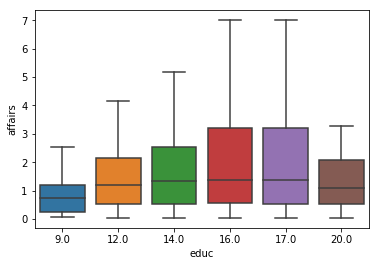

In [4]:
#show a box plot for affairs by years of education category
df_affairs = df[df['affairs'] > 0] #consider only those women who had at least one affair
sns.boxplot('educ', 'affairs', data=df_affairs, **{'showfliers': False})
plt.show()

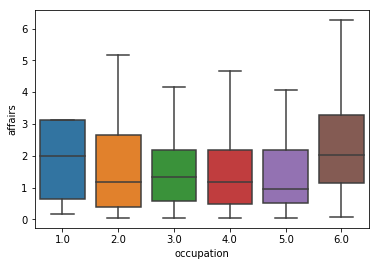

In [5]:
#show a box plot for affairs by occupation category
sns.boxplot('occupation', 'affairs', data=df_affairs, **{'showfliers': False})
plt.show()

The box plots above show that among women who had at least one affair, there does appear to be a notable difference between women in the *9.0* and *12.0* years of education categories, and between women in the *1.0* and *2.0* occupation categories. In light of these differences, and considering that we have a reasonable number of cases in each category, there is no compelling reason to perform any categorical aggregation.

## Transforming Numeric Variables
Many of the most common and familiar statistical methods assume that the underlying data are normally distributed. If a variable is not normally distributed and it is included in a statistical model that requires normally distributed data in order to behave properly, the resulting model may be unstable or unreliable and hence of little value. Data scientists should always therefore check this assumption, and perform relevant transformations to normalize the variables in the data set (or at a minimum, make the distributions of those variables more symmetric).

A common technique for evaluating whether the distribution of a variable is symmetric is to examine its **skew**. If a variable has a skew between -0.5 and 0.5, then it is reasonably symmetrical. Values larger than 0.5 indicate significant right skew, while values less than -0.5 indicate significant left skew. In these situations, we can attempt to apply a transformation to normalize the distribution. Let's examine the skew of our variables:

In [6]:
#show the skew of each variable
df.skew()

rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            8.764859
dtype: float64

As shown above, many of our variables have an unacceptable level of skew. As an illustrative example, let's take a closer look at the *children* variable, which has a skew of approximately 0.89:

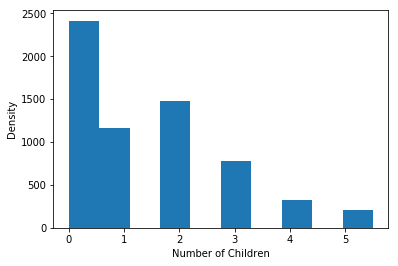

In [7]:
#draw a histogram of the 'children' variable
plt.hist(df['children'])
plt.xlabel('Number of Children')
plt.ylabel('Density')
plt.show()

The histogram above confirms that the *children* variable is highly right skewed. To attempt to reconcile this problem, we can apply a **log transformation**. Log transformations are often very useful for right-skewed data. In this case, we will apply a **log-plus-one transformation** because many women in our data set have zero children, and the log of zero is undefined:

In [8]:
#apply a log-plus-one transformation to the 'children' variable:
df['log_children'] = np.log1p(df['children'])

#show the skew of the transformed variable
df['log_children'].skew()

0.09216479763147024

The skew of the *children* variable is much improved! Let's apply similar transformations to the other variables in the data set that have an unacceptle level of skew. The *yrs_married* variable has many values that are close to zero, so we'll use a log-plus-one transformation for that variable. Regular log transformations should work well for the *age* and *educ* variables.

Note that *rate_marriage* is highly left-skewed, so we will apply an **exponential transformation** to that particular variable. Exponential transformations are often useful for handling left-skewed variables:

In [9]:
#apply log transformations to the 'age', 'yrs_married', and 'educ' variables
df['log_age'] = np.log(df['age'])
df['log_yrs_married'] = np.log1p(df['yrs_married'])
df['log_educ'] = np.log(df['educ'])

#apply an exponential transformation to the 'rate_marriage' variable
df['exp_rate_marriage'] = np.exp(df['rate_marriage'])

#show the skew of all transformed variables
df[['exp_rate_marriage', 'log_age', 'log_yrs_married', 'log_children', 'log_educ', 'exp_rate_marriage']].skew()

exp_rate_marriage    0.098898
log_age              0.234236
log_yrs_married     -0.127719
log_children         0.092165
log_educ             0.388008
exp_rate_marriage    0.098898
dtype: float64

## Feature Engineering ##
We'll next turn our attention to engineering a few features relating to the subjects' participation in extramarital affairs. To begin, let's compute a simple binary dummy variable that indicates whether a woman engaged in at least one affair after getting married. We can rely on the *affairs* variable as the basis for engineering this new feature, since the value of *affairs* will be zero if and only if a woman had no affairs after getting married:

In [10]:
#compute a variable that indicates whether a woman had an affair
df['had_an_affair'] = np.where(df['affairs'] > 0.0, 1.0, 0.0)

Recall the definition of the *affairs* variable, as discussed previously:
#### affairs
A measure of time that each woman has spent in extramarital affairs. This is a computed variable whose values were determined using the following formula:
    
$
\begin{align}
\frac{ab}{c}
\end{align}
$

Where:
* ***a*** = the number of men other than her husband with whom each woman has had sexual relations since getting married. Coded as:
    * 1 man = 1.0
    * 2 to 5 men = 3.5
    * 6 to 10 men = 8.0
    * more than 10 men = 12.0
* ***b*** = The average number of times each woman had sexual relations with each of the men identified in ***a***. Coded as:
    * 1 time with each man = 1.0
    * 2 to 5 times with each man = 3.5
    * 6 to 10 times with each man = 8.0
    * more than 10 times with each man = 12.0
    * it varied greatly from partner to partner = 5.6
* ***c*** = number of years married, per the description of *yrs_married* above

As detailed above, *affairs* is a computed variable that is comprised of three components. Although one of these components is included in our data set (i.e., the *yrs_married* variable), the other two variables were not included. The two unknown variables (***a*** and ***b*** in the equation above) may be able to provide us with some very interesting insights into the subjects' behavior with respect to extramarital affairs, but unfortunately we were not provided with these data. Is it possible to recover the values of these variables from our available information? **YES!** -- but not perfectly. Let's see how many of the original values we can recover...

To begin, we'll create a few columns to hold the currently unknown values:

In [12]:
#create a column to hold the number of men with whom each woman has had an affair since getting married
df['number_of_lovers'] = np.nan #default value is NaN (Not a Number) -- this indicates a missing value

#create a column to hold the average number of times each woman engaged in extramarital sexual relations with each of her lovers
df['times_per_lover'] = np.nan #default value is NaN (Not a Number) -- this indicates a missing value

If a woman had no affairs after getting married, then the values of both of these variables will be zero. Let's add these values to our data set:

In [13]:
#update values of the 'number_of_lovers' and 'times_per_lover' variables for women who never had an affair
df['number_of_lovers'] = np.where(df['had_an_affair'] == 0.0, 0.0, np.nan)
df['times_per_lover'] = np.where(df['had_an_affair'] == 0.0, 0.0, np.nan)

Now it's time for some clever mathematical trickery! 

Recall the definition of the *affairs* variable. Since we know the values of *yrs_married* for each woman (variable **c** in the equation), we can easily recover the *product* of our two variables of interest (variables **a** and **b** in the equation) by multiplying the value of the *affairs* variable for each woman by the corresponding value of the *yrs_married* variable.

Next, recall that both of our variables of interest have a finite set of possible values. For the *number_of_lovers* variable, these values are 1.0, 3.5, 8.0, and 12.0. For the *times_per_lover* variable, these values are 1.0, 3.5, 8.0, 12.0, and 5.6. This means that there is a finite set of possibilities for the product of these two values. The complete set of possibilities is:
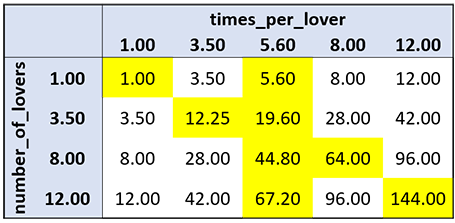
Values highlighted in yellow above are unique. Put differently, **there is only one possible combination of the *number_of_lovers* and *times_per_lover* variables that will yield each of these values**. This means that if we observe any of these values for the product of our two variables of interest, then we will know exactly what the values of *number_of_lovers* and *times_per_lover* are for the woman in question!

Let's finish our feature engineering section by calculating these values:

In [14]:
#calculate the product of 'number_of_lovers' and 'times_per_lover' (rounded to 2 decimal points to account for floating-point error)
df['product'] = round(df['affairs'] * df['yrs_married'], 2)

#define a function that computes values for the 'number_of_lovers' and 'times_per_lover' variables
def GetValue(var_name, product, current_value):
    #if the value is already known
    if current_value == 0.0:
        return 0.0
    #number_of_lovers variable
    if var_name == 'number_of_lovers':
        if product == 1.00 or product == 5.60:
            return 1.0
        elif product == 12.25 or product == 19.60:
            return 3.5
        elif product == 44.80 or product == 64.00:
            return 8.0
        elif product == 67.20 or product == 144.00:
            return 12.0
        else:
            return np.nan            
    #times_per_lover variable
    elif var_name == 'times_per_lover':
        if product == 1.00:
            return 1.0
        elif product == 12.25:
            return 3.5
        elif product == 5.60 or product == 19.60 or product == 44.80 or product == 67.20:
            return 5.6
        elif product == 64.00:
            return 8.0
        elif product == 144.00:
            return 12.0
        else:
            return np.nan
    #unknown variable name
    else:
        return np.nan

#compute all knowable values for 'number_of_lovers'
df['number_of_lovers'] = [GetValue('number_of_lovers', i, j) for i, j in df[['product', 'number_of_lovers']].itertuples(index=False)]

#compute all knowable values for 'times_per_lover'
df['times_per_lover'] = [GetValue('times_per_lover', i, j) for i, j in df[['product', 'times_per_lover']].itertuples(index=False)]

In [15]:
#drop the *product* column since it's no longer needed
df = df.drop(['product'], axis=1)

In [16]:
#drop any rows that contain missing values (listwise deletion)
df_final = df.dropna()

In [17]:
#examine the final descriptives
df_final.describe()

rate_marriage          age  yrs_married     children    religious  \
count    5291.000000  5291.000000  5291.000000  5291.000000  5291.000000   
mean        4.197694    28.792667     8.579191     1.330561     2.457380   
std         0.921617     6.837004     7.211074     1.430055     0.883705   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    13.000000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  log_children  \
count  5291.000000  5291.000000      5291.000000  5291.000000   5291.000000   
mean     14.261387     3.422037         3.845587     0.464598      0.661997   
std       2.198621     0.939834         1.350127     1.962980      0.608358   
min       9.000000     1.000000         1.000000     0.000000      0.000000   
25%      12.000000     3.000000         3.000000     0.000000      0.000000   
50%      14.000000     3.000000         4.000000     0.000000      0.693147   
75%      16.000000     4.000000         5.000000     0.000000      1.098612   
max      20.000000     6.000000         6.000000    57.599991      1.871802   

           log_age  log_yrs_married     log_educ  exp_rate_marriage  \
count  5291.000000      5291.000000  5291.000000        5291.000000   
mean      3.333150         1.953168     2.646208          90.294735   
std       0.230237         0.810948     0.149289          55.299483   
min       2.862201         0.405465     2.197225           2.718282   
25%       3.091042         1.252763     2.484907          54.598150   
50%       3.295837         1.945910     2.639057          54.598150   
75%       3.465736         2.639057     2.772589         148.413159   
max       3.737670         3.178054     2.995732         148.413159   

       had_an_affair  number_of_lovers  times_per_lover  
count    5291.000000       5291.000000      5291.000000  
mean        0.184842          0.682007         0.737082  
std         0.388206          1.803469         1.762551  
min         0.000000          0.000000         0.000000  
25%         0.000000          0.000000         0.000000  
50%         0.000000          0.000000         0.000000  
75%         0.000000          0.000000         0.000000  
max         1.000000         12.000000        12.000000

As you can see, we were able to recover **5,281** (or 83%) of the 6,366 original *number_of_lovers* and *times_per_lover* values. Not bad!

In [18]:
#examine the final correlations
df_final.corr()

rate_marriage       age  yrs_married  children  religious  \
rate_marriage           1.000000 -0.104420    -0.122760 -0.122958   0.078354   
age                    -0.104420  1.000000     0.893270  0.680556   0.139425   
yrs_married            -0.122760  0.893270     1.000000  0.779779   0.137936   
children               -0.122958  0.680556     0.779779  1.000000   0.150637   
religious               0.078354  0.139425     0.137936  0.150637   1.000000   
educ                    0.078887  0.030744    -0.106338 -0.138383   0.038377   
occupation              0.035039  0.106820     0.041523 -0.007053   0.041805   
occupation_husb         0.021803  0.173294     0.136521  0.098306   0.005178   
affairs                -0.157616 -0.053124    -0.045575 -0.036997  -0.107736   
log_children           -0.146584  0.667413     0.770625  0.965475   0.141052   
log_age                -0.106415  0.993301     0.875277  0.675176   0.133681   
log_yrs_married        -0.147091  0.841019     0.944906  0.758132   0.116570   
log_educ                0.081929  0.019523    -0.117683 -0.145695   0.034824   
exp_rate_marriage       0.919225 -0.076733    -0.094655 -0.096735   0.083954   
had_an_affair          -0.300820  0.123483     0.171794  0.134743  -0.112034   
number_of_lovers       -0.269703  0.144194     0.190138  0.139825  -0.098739   
times_per_lover        -0.291338  0.150538     0.196677  0.145938  -0.102838   

                       educ  occupation  occupation_husb   affairs  \
rate_marriage      0.078887    0.035039         0.021803 -0.157616   
age                0.030744    0.106820         0.173294 -0.053124   
yrs_married       -0.106338    0.041523         0.136521 -0.045575   
children          -0.138383   -0.007053         0.098306 -0.036997   
religious          0.038377    0.041805         0.005178 -0.107736   
educ               1.000000    0.384992         0.182549 -0.018865   
occupation         0.384992    1.000000         0.203771  0.005861   
occupation_husb    0.182549    0.203771         1.000000 -0.010678   
affairs           -0.018865    0.005861        -0.010678  1.000000   
log_children      -0.142713   -0.012217         0.100252 -0.029159   
log_age            0.050297    0.116207         0.184087 -0.051088   
log_yrs_married   -0.083178    0.047362         0.151505 -0.033263   
log_educ           0.995108    0.383373         0.181973 -0.016939   
exp_rate_marriage  0.074496    0.028648         0.026842 -0.140798   
had_an_affair     -0.058833    0.037433         0.018400  0.497076   
number_of_lovers  -0.058817    0.041943         0.023578  0.649996   
times_per_lover   -0.052322    0.031861         0.026095  0.618005   

                   log_children   log_age  log_yrs_married  log_educ  \
rate_marriage         -0.146584 -0.106415        -0.147091  0.081929   
age                    0.667413  0.993301         0.841019  0.019523   
yrs_married            0.770625  0.875277         0.944906 -0.117683   
children               0.965475  0.675176         0.758132 -0.145695   
religious              0.141052  0.133681         0.116570  0.034824   
educ                  -0.142713  0.050297        -0.083178  0.995108   
occupation            -0.012217  0.116207         0.047362  0.383373   
occupation_husb        0.100252  0.184087         0.151505  0.181973   
affairs               -0.029159 -0.051088        -0.033263 -0.016939   
log_children           1.000000  0.669758         0.781184 -0.150521   
log_age                0.669758  1.000000         0.845512  0.039373   
log_yrs_married        0.781184  0.845512         1.000000 -0.094201   
log_educ              -0.150521  0.039373        -0.094201  1.000000   
exp_rate_marriage     -0.122825 -0.080571        -0.126538  0.076741   
had_an_affair          0.153253  0.130659         0.199326 -0.059639   
number_of_lovers       0.152204  0.147716         0.203911 -0.060450   
times_per_lover        0.163019  0.155355         0.216033 -0.054049   

                   e